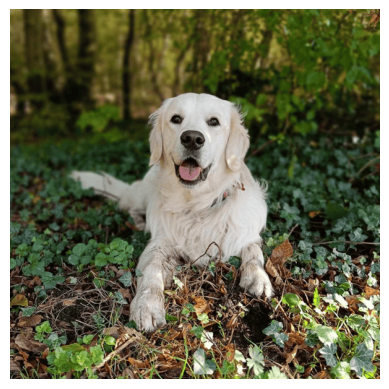

In [1]:
import matplotlib.pyplot as plt

ini_im = plt.imread('Kadoc.png', format='png')[:,:,0:3] # Read the image file
plt.imshow(ini_im)
plt.axis('off')  # Hide the axes
plt.show()  # Display the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029521434..1.0211815].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58222145..1.5079046].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1766851..1.8830073].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6208482..2.3136714].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2512288..2.8388617].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.5489705..3.241364].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9913

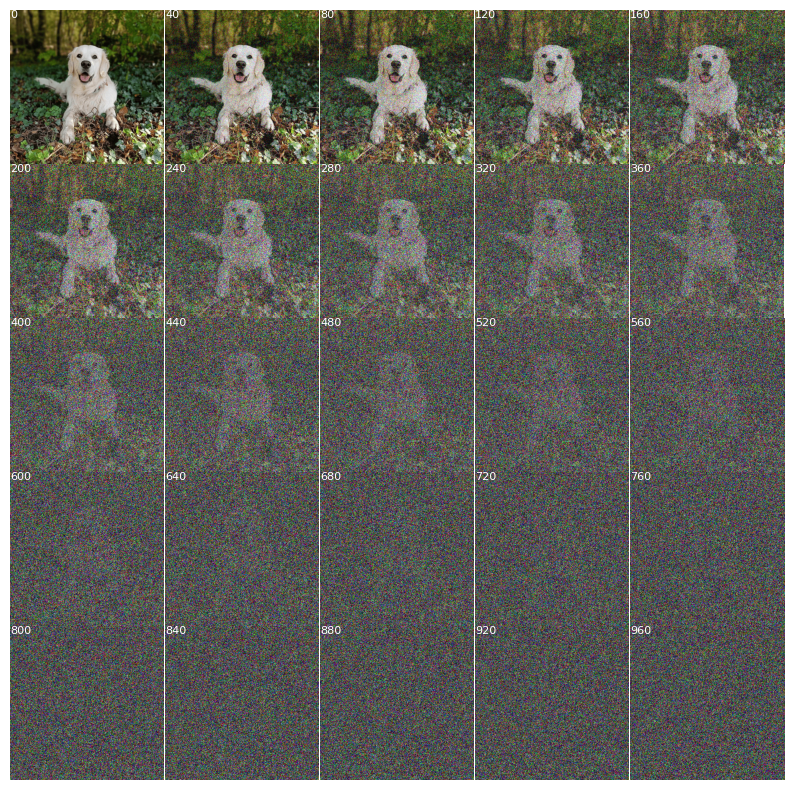

In [ ]:
import sys
sys.path.append('..')

import torch
from src.core.schedule import LinearNoiseScheduler

# Add noise one step at a time
noise_scheduler = LinearNoiseScheduler(
    steps=1000,
    betas=(1e-4, 0.02),
    seed=42
)

all_images = []
x = torch.tensor(ini_im)
for i in range(noise_scheduler.steps):
    x = noise_scheduler.single_step(x, i)
    if i % (noise_scheduler.steps // 25) == 0:
        all_images.append(x.numpy())

# Generate a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# Plot each image in the grid
for i, ax in enumerate(axs.flat):
    if i < len(all_images):
        ax.imshow(all_images[i])
        ax.text(0.5, 0.5, str(i * (noise_scheduler.steps // 25)), color='white', fontsize=8, ha='left', va='top')
    ax.axis('off')  # Hide the axes
plt.show()  # Display the grid of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029524209..1.0211838].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6041661..1.4513738].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.145685..2.0079405].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6626524..2.4309623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.21939..2.9598763].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.7342625..2.9930344].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1356382

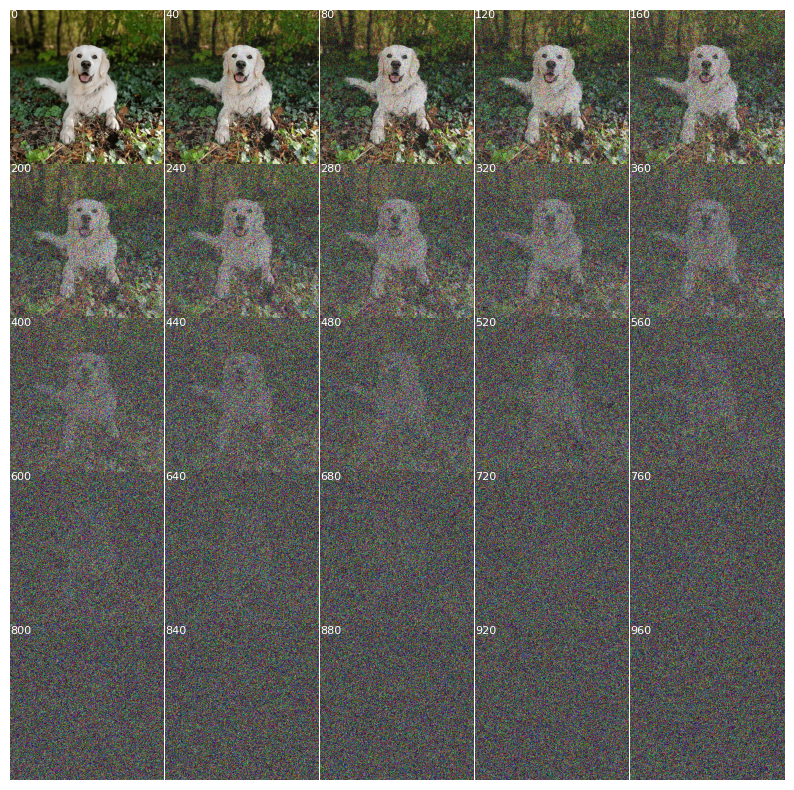

In [4]:
import sys
sys.path.append('..')

import torch
from src.core.schedule import LinearNoiseScheduler

# Add noise one step at a time
noise_scheduler = LinearNoiseScheduler(
    steps=1000,
    betas=(1e-4, 0.02),
    seed=42
)

all_images = []
x = torch.tensor(ini_im)
for i in range(noise_scheduler.steps):
    if i % (noise_scheduler.steps // 25) == 0:
        all_images.append(noise_scheduler.multi_steps(x, i))

# Generate a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# Plot each image in the grid
for i, ax in enumerate(axs.flat):
    if i < len(all_images):
        ax.imshow(all_images[i])
        ax.text(0.5, 0.5, str(i * (noise_scheduler.steps // 25)), color='white', fontsize=8, ha='left', va='top')
    ax.axis('off')  # Hide the axes
plt.show()  # Display the grid of images

In [ ]:
# Results are not equivalent (only similar) because the noise scheduler updates the seed for each step
# and the multi_steps method does not.
# The multi_steps method applies the noise in a single operation, while single_step applies it iteratively.
# This can lead to different noise patterns and thus different results, even if the overall noise level is similar.